 Name: Anil Bhavanam Honnappa Gowda

ID: 1001966285

Project 3

In [ ]:
# reference: taken refference for implenting k means from the link given https://github.com/Suji04/ML_from_Scratch/blob/master/K-means%20Clustering.ipynb


### Libraries required
import numpy as np                                                  # importing numpy library
import pandas as pd                                                 # importing pandas library
from scipy.stats import fisher_exact                                # importing scipy.stats library for Fisher's Exact Test
import csv
import matplotlib.pyplot as plt

import missingno as msn
import random as rd
from sklearn.cluster import KMeans

# loading the dataset

In [ ]:
from scipy.sparse import data
dataset=pd.read_csv('/content/iris.data',names=['sepal_length','sepal_width','petal_lenth','petal_width','flower_name'])


# Dataset det contains 5 columns , but we drop the 5th colomn(Target/Flower_name) since K means is a unsupervised algorithm and it works on the unlabeled data

In [ ]:
dataset.iloc[:,[0,1,2,3]].head(5)

,sepal_length,sepal_width,petal_lenth,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# checking the data to clean data

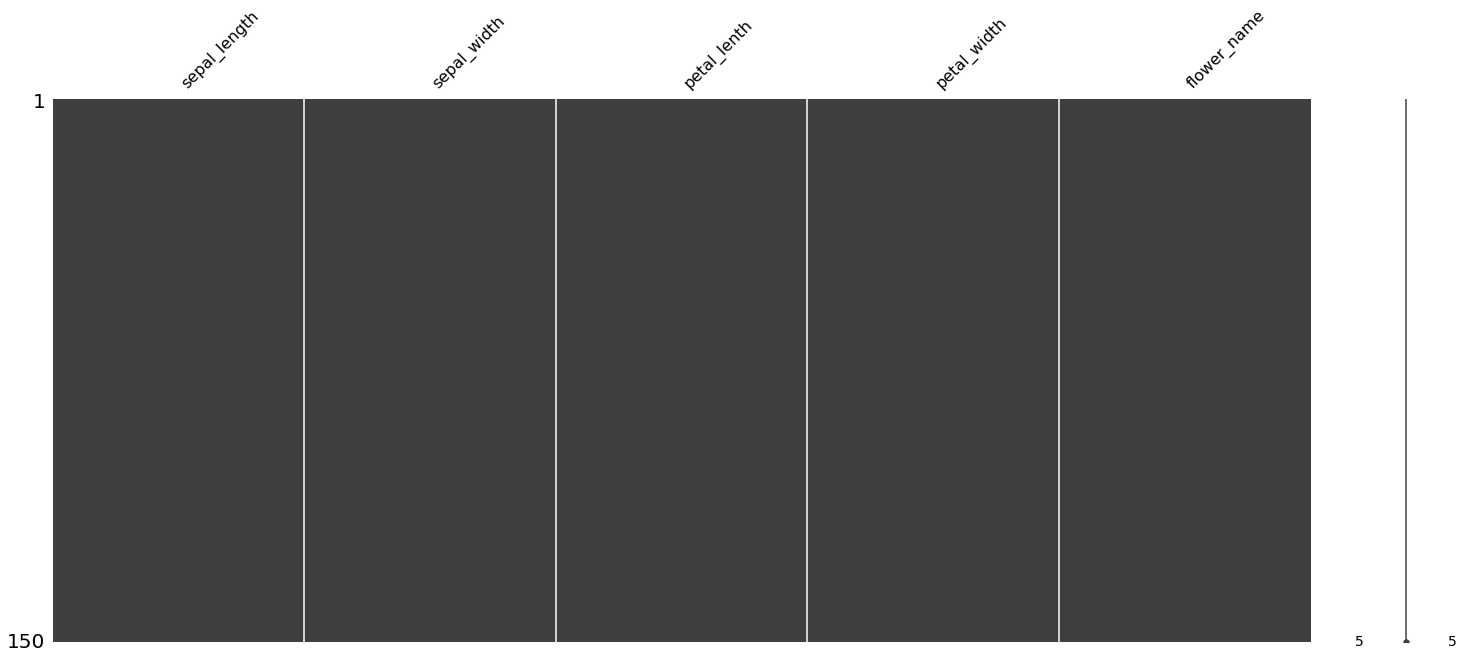

In [ ]:
msn.matrix(dataset)

# Since data is clear and clean ,let us plot the data and visualize it in scatter plot

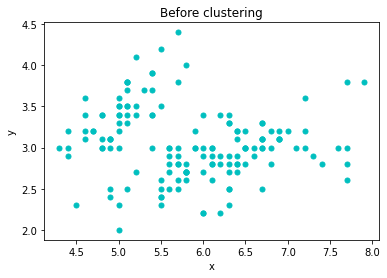

In [ ]:
y=dataset.iloc[:,1]
x=dataset.iloc[:,0]
plt.scatter(x,y,label='Before the clustering',color='c',s=25,marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Before clustering')
plt.legend
plt.show()

# Next step is to know the number of cluster groups that is K, to know K value we will use Elbow method to determine K value.

In [ ]:
def elbow_method(self,d=dataset):
    from matplotlib import style
    WCSS=[]
    x_axis=range(1,13)
    i=1
    while i<=12:
       clusters = KMeans(n_clusters = i).fit(dataset.iloc[:,2:4])
       clusters.fit(dataset.iloc[:,2:4])
       WCSS.append(clusters.inertia_)
       i+=1
    plt.plot(x_axis, WCSS,linewidth=4,c='b')
    plt.title('Elbow method to find k')
    plt.xlabel('No of clusters')
    plt.ylabel('WCSS')
    plt.show()

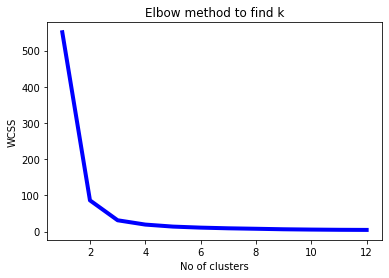

In [ ]:
elbow_method(dataset)

# From the above Elbow method graph, K value is determined as 3 , Next is implementing K means algorithm

In [ ]:
def init_centroids(K_Value, data_value):
    clus = []
    for i in range(K_Value):
        centroid1,centroid2 = np.random.uniform(min(data_value[:,0]), max(data_value[:,0])),np.random.uniform(min(data_value[:,1]), max(data_value[:,1]))
        clus.append([centroid1, centroid2])
    return np.asarray(clus)

def dist(a, b):
    dis=np.sqrt(sum(np.square(a-b)))
    return dis

def assign_cluster(K_Value, data_value, cg):
    cluster = [-1]*len(data_value)
    for i in range(len(data_value)):
        dist_arr = []
        j=0
        while j< K_Value:
            dist_arr.append(dist(data_value[i], cg[j]))
            j+=1
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

def compute_centroids(K_Value, data_value, cluster):
    cen_arr = []
    for i in range(K_Value):
        arr = []
        j=0
        while j<len(data_value):
            if cluster[j]==i:arr.append(data_value[j])
            j+=1

        cen_arr.append(np.mean(arr, axis=0))
    return np.asarray(cen_arr)

def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new): res+=dist(a,b)
    return res

def show_clusters(data_value, cluster, cg):
    dframe = pd.DataFrame(dict(x=data_value[:,0], y=data_value[:,1], label=cluster))
    col = {0:'red', 1:'black', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = dframe.groupby('label')
    for i, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=i, color=col[i])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

# You will get each graph for each iteration, and iteration stops when the result cluster group is optained and hence the last graph is the final clustering result.

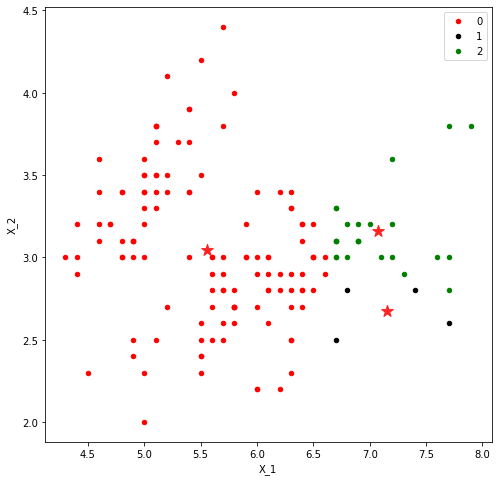

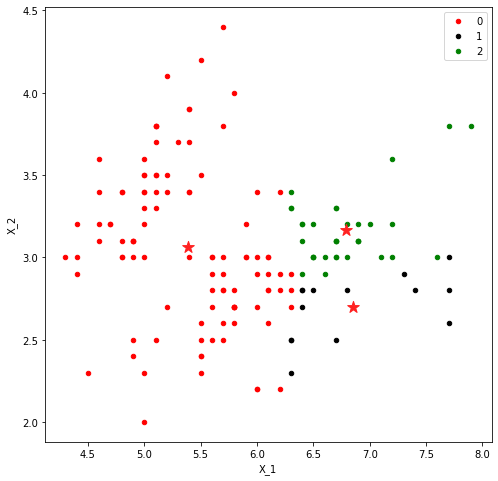

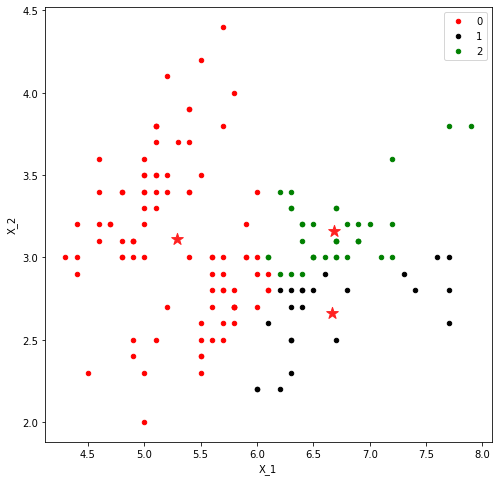

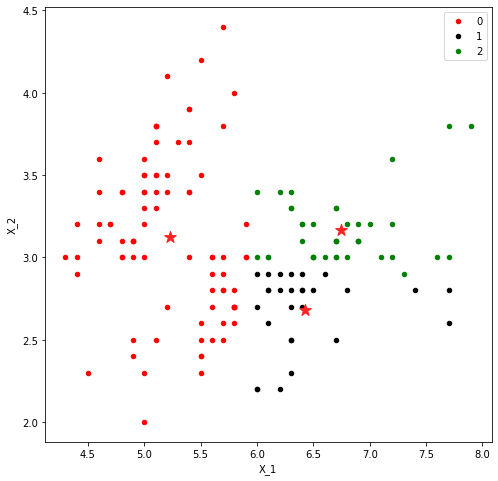

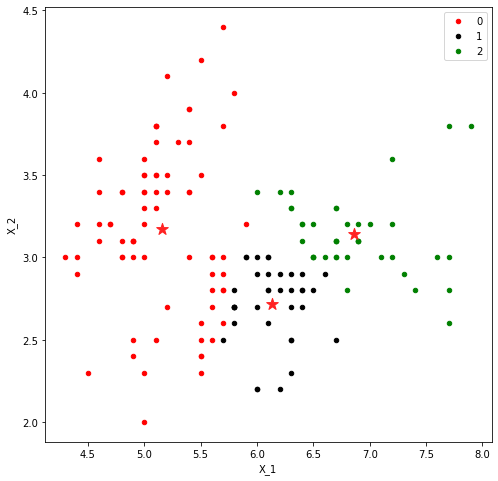

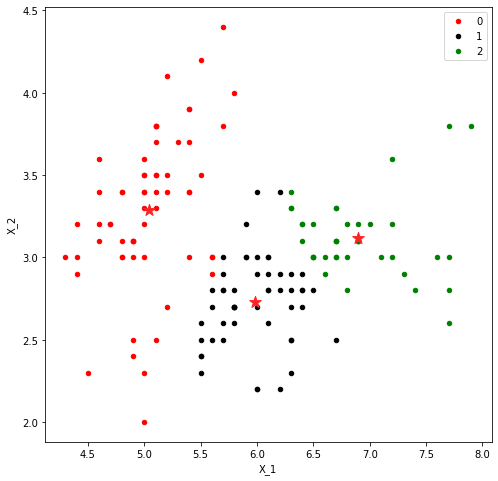

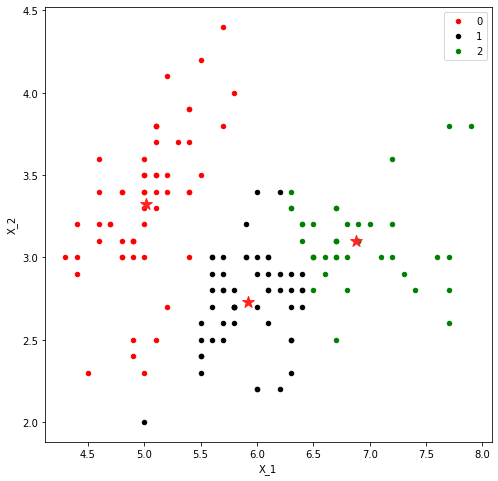

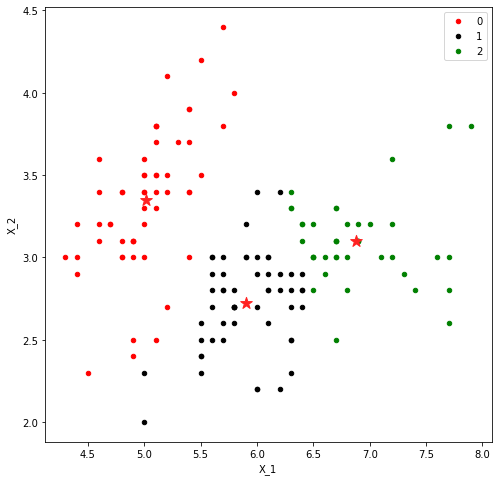

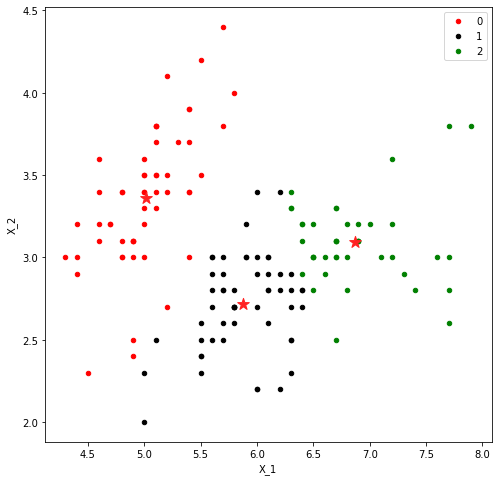

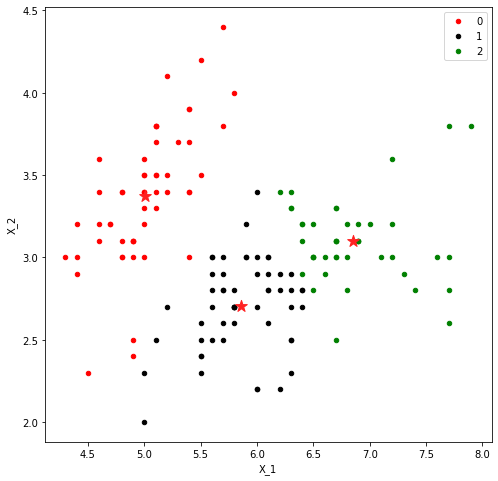

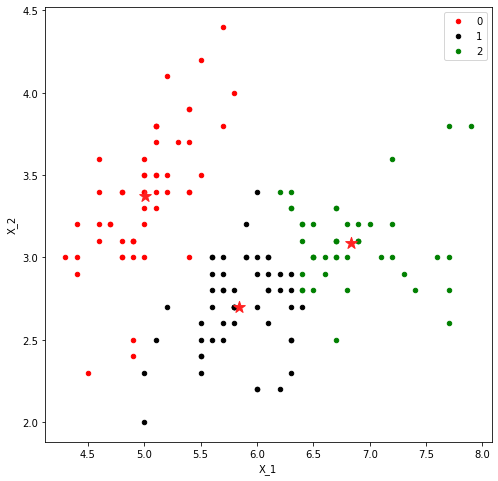

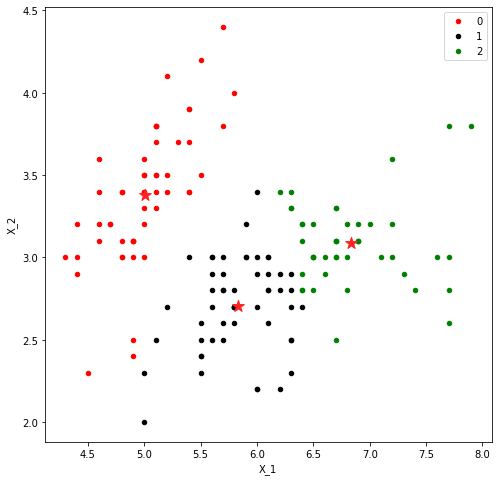

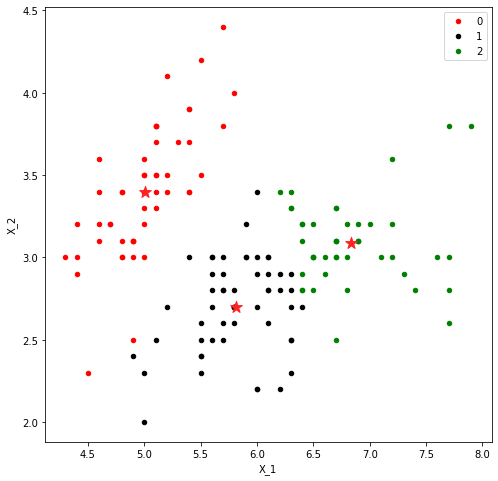

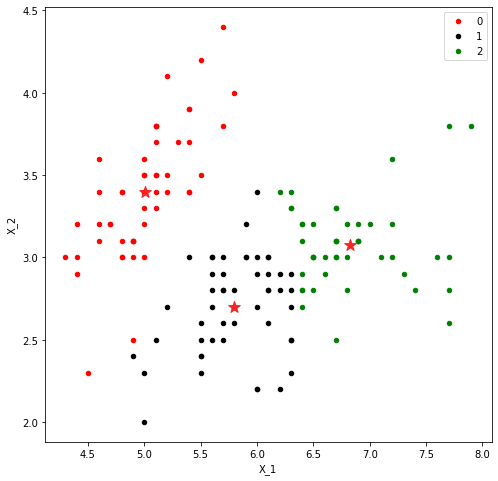

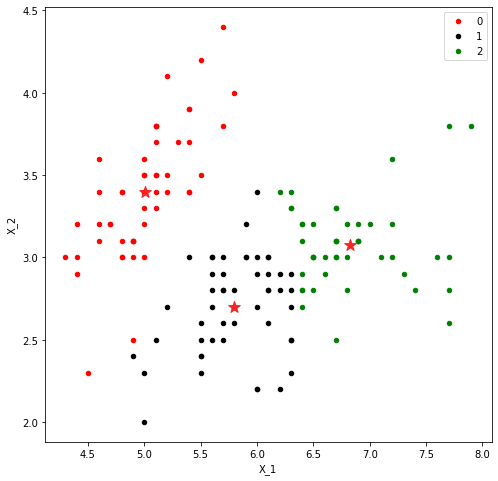

In [ ]:
def k_means(K_Value, data_value):
    clus_int = init_centroids(K_Value, data_value)
    cluster = [0]*len(data_value)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(K_Value, data_value, clus_int)
        cg_new = compute_centroids(K_Value, data_value, cluster)
        cg_change = measure_change(cg_new, clus_int)
        clus_int = cg_new
        show_clusters(data_value, cluster, clus_int)
    return cluster
K_Value=3
data=dataset.iloc[:,0:2].values
cluster = k_means(3, data)